In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
using PhasorNetworks

In [3]:
using JLD2, Plots

In [4]:
using Base: @kwdef

In [5]:
using Random

In [6]:
using Statistics: mean

In [7]:
using HypothesisTests

In [8]:
@kwdef struct Args
	nodes::Int = 20
	p_edge::Real = 0.1
	d_vsa::Int = 1024
	rng::AbstractRNG
	spk_args::SpikingArgs
end

Args

In [9]:
#file = "data/" * "result_2024-05-14T03:22:36.226.jld2"

In [10]:
file = "data/result_2024-05-19T00:32:31.396.jld2"

"data/result_2024-05-19T00:32:31.396.jld2"

In [11]:
#file = "data/data/" * "result_2024-05-13T00:27:31.714.jld2"

In [12]:
data = load_object(file)

┌ Warning: type OrdinaryDiffEqTsit5.Tsit5{OrdinaryDiffEq.#trivial_limiter!,OrdinaryDiffEq.#trivial_limiter!,Static.False} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:489


2-element Vector{Pair{String, Vector}}:
 "arguments" => Args[Args(25, 0.1, 1024, Xoshiro(0x05140e23e351af36, 0x6ee19c752ad8315b, 0xcec33266229422cb, 0x748d11cca4852d15, 0x8b645c1a90632cd1), Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)
), Args(25, 0.1, 1024, Xoshiro(0x22fb4190e7a07884, 0x9cd7d655c9be4a55, 0xe41233d24169ce71, 0xb5b9f8d081c697be, 0x65f39561185a85ea), Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)
), Args(25, 0.1, 1024, Xoshiro(0x1faba917b14a2806, 0x72b36569356de68d, 0x3c9d7550b63c64b3, 0x4d6531f9d1ecb11a, 0xc49d81bb9e3aaae2), Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)
), Args(25, 0.1, 1024, Xoshiro(0xe648b68f74e3da35, 0x2b60acf1a68eef6b, 0xd636a27c23921279, 0x56052d39e705ed69, 0xf1a026666b9482b2), Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)
), Args(25, 0.1, 1024, Xoshiro(0xc7d7effc457d1b75, 0xa79c9

In [13]:
#file2 = "data/data/" * "result_2023-09-29T16:29:42.502.jld2"

In [14]:

#data2 = load_object(file2);

In [15]:
args_1 = data[1][2];
#args_2 = data2[1][2]; 

In [16]:
args_1

108-element Vector{Args}:
 Args(25, 0.1, 1024, Xoshiro(0x05140e23e351af36, 0x6ee19c752ad8315b, 0xcec33266229422cb, 0x748d11cca4852d15, 0x8b645c1a90632cd1), Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)
)
 Args(25, 0.1, 1024, Xoshiro(0x22fb4190e7a07884, 0x9cd7d655c9be4a55, 0xe41233d24169ce71, 0xb5b9f8d081c697be, 0x65f39561185a85ea), Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)
)
 Args(25, 0.1, 1024, Xoshiro(0x1faba917b14a2806, 0x72b36569356de68d, 0x3c9d7550b63c64b3, 0x4d6531f9d1ecb11a, 0xc49d81bb9e3aaae2), Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)
)
 Args(25, 0.1, 1024, Xoshiro(0xe648b68f74e3da35, 0x2b60acf1a68eef6b, 0xd636a27c23921279, 0x56052d39e705ed69, 0xf1a026666b9482b2), Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)
)
 Args(25, 0.1, 1024, Xoshiro(0xc7d7effc457d1b75, 0xa79c9c64602a29c1, 0x7781db5a216249d5, 0

In [17]:
vals_1 = data[2][2];
#vals_2 = data2[2][2];

In [18]:
vals_1

108-element Vector{Tuple{Tuple{Float64, Float64}, Tuple{Float64, Float64}}}:
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ⋮
 ((0.9956784774954364, 1.1503771182910238e-8), (0.9944128859259808, 1.3933617744178542e-8))
 ((0.9941394380339076, 1.4762111815604573e-8), (0.9939760305357237, 1.3996191421327787e-8))
 ((0.9944484868972622, 1.2586486999404004e-8), (0.9938909076701643, 1.2730117349837084e-8))
 ((0.993376917109579, 1.4040108243088722e-8), (0.9931098605201798, 1.3662740501437117e-8))
 ((0.9940352026526337, 1.3778289579273811e-8), (0.9923100970847836, 1.2005033389250968e-8))
 ((0.9927357295270599, 1.4340059804022768e-8), (0.99157303437586, 1.3976232793825448e-8))
 ((0.9883579762325696, 1.44144386

In [19]:
args = args_1
vals = vals_1

108-element Vector{Tuple{Tuple{Float64, Float64}, Tuple{Float64, Float64}}}:
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ((1.0, 0.0), (1.0, 0.0))
 ⋮
 ((0.9956784774954364, 1.1503771182910238e-8), (0.9944128859259808, 1.3933617744178542e-8))
 ((0.9941394380339076, 1.4762111815604573e-8), (0.9939760305357237, 1.3996191421327787e-8))
 ((0.9944484868972622, 1.2586486999404004e-8), (0.9938909076701643, 1.2730117349837084e-8))
 ((0.993376917109579, 1.4040108243088722e-8), (0.9931098605201798, 1.3662740501437117e-8))
 ((0.9940352026526337, 1.3778289579273811e-8), (0.9923100970847836, 1.2005033389250968e-8))
 ((0.9927357295270599, 1.4340059804022768e-8), (0.99157303437586, 1.3976232793825448e-8))
 ((0.9883579762325696, 1.44144386

In [20]:
# args = vcat(args_1, args_2)
# vals = vcat(vals_1, vals_2);

In [21]:
p_edges = [arg.p_edge for arg in args]
auroc_static = [val[1][1] for val in vals]
auroc_dynamic = [val[2][1] for val in vals];

In [22]:
auroc_static_avg = [val[1][1] for val in vals]
auroc_dynamic = [val[2][1] for val in vals];

In [23]:
function average_auroc(p_edges, args, vals)
    ps = sort!(unique(p_edges))
    
    function getmean(p)
        matches = map(x -> x.p_edge == p, args)
        auc = getindex.(vals[matches], 1)
        auc_mean = mean(auc)
        return auc_mean
    end

    return map(getmean, ps)
end

average_auroc (generic function with 1 method)

In [24]:
static_trend = average_auroc(p_edges, args, auroc_static)
dynamic_trend = average_auroc(p_edges, args, auroc_dynamic)

9-element Vector{Float64}:
 1.0
 0.9999613704675725
 0.9989630690834171
 0.9962939258782922
 0.9945636987458175
 0.9903059621229605
 0.9881256678265166
 0.990206601064369
 0.9912099401062306

In [25]:
p_unique = sort!(unique(p_edges))

9-element Vector{Float64}:
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9

In [26]:
n_edges = p_edges .* [arg.nodes for arg in args] .^ 2;

In [27]:
MannWhitneyUTest(auroc_static, auroc_dynamic)

Approximate Mann-Whitney U test
-------------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.000692095

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7529

Details:
    number of observations in each group: [108, 108]
    Mann-Whitney-U statistic:             5976.5
    rank sums:                            [11862.5, 11573.5]
    adjustment for ties:                  85140.0
    normal approximation (μ, σ):          (144.5, 457.32)


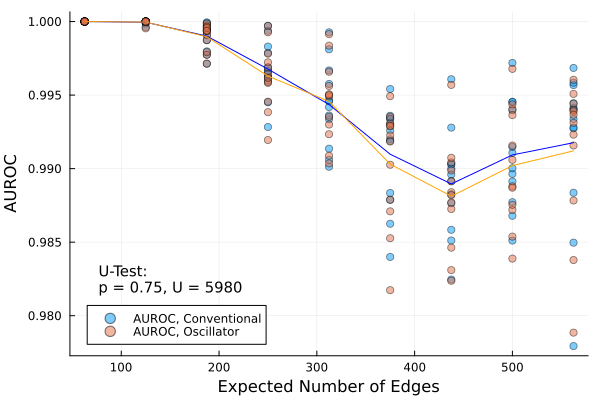

In [29]:
fig = scatter(n_edges, auroc_static, label="AUROC, Conventional", alpha=0.5)
scatter!(n_edges, auroc_dynamic, label="AUROC, Oscillator", alpha=0.5)
plot!(p_unique .* 25^2, static_trend, label=missing, color="blue")
plot!(p_unique .* 25^2, dynamic_trend, label=missing, color="orange")
ylabel!("AUROC")
xlabel!("Expected Number of Edges")
annotate!(78, 0.9825, text("U-Test:\np = 0.75, U = 5980", 10, :left))
#ylims!(0.80, 1.01)

In [30]:
png(fig, "figures/AUROC curves.png")

"figures/AUROC curves.png"

In [41]:
OneWayANOVATest(auroc_static, auroc_dynamic)

One-way analysis of variance (ANOVA) test
-----------------------------------------
Population details:
    parameter of interest:   Means
    value under h_0:         "all equal"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.6235

Details:
    number of observations: [108, 108]
    F statistic:            0.241667
    degrees of freedom:     (1, 214)


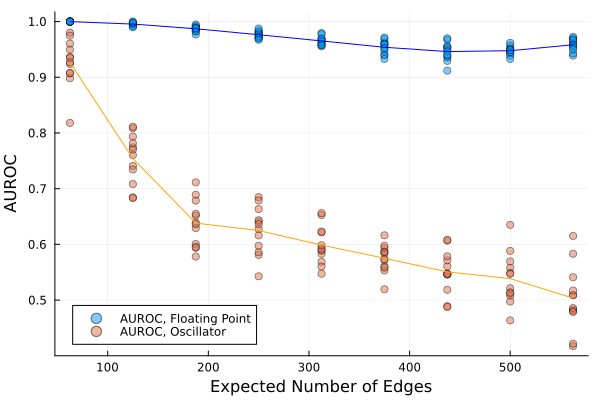

In [45]:
fig = scatter(n_edges, auroc_static, label="AUROC, Floating Point", alpha=0.5)
scatter!(n_edges, auroc_dynamic, label="AUROC, Oscillator", alpha=0.5)
plot!(p_unique .* 25^2, static_trend, label=missing, color="blue")
plot!(p_unique .* 25^2, dynamic_trend, label=missing, color="orange")
ylabel!("AUROC")
xlabel!("Expected Number of Edges")
#ylims!(0.80, 1.01)

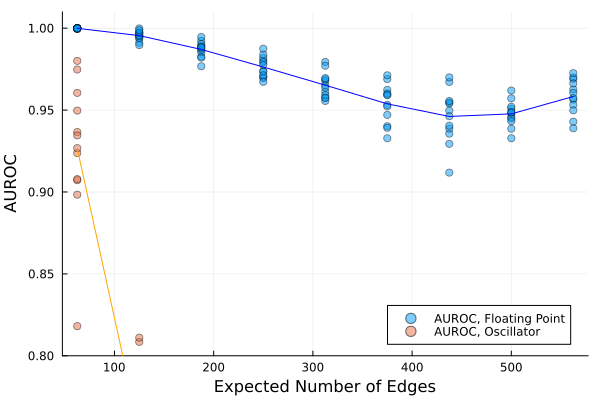

In [46]:
fig = scatter(n_edges, auroc_static, label="AUROC, Floating Point", alpha=0.5)
scatter!(n_edges, auroc_dynamic, label="AUROC, Oscillator", alpha=0.5)
plot!(p_unique .* 25^2, static_trend, label=missing, color="blue")
plot!(p_unique .* 25^2, dynamic_trend, label=missing, color="orange")
ylabel!("AUROC")
xlabel!("Expected Number of Edges")
ylims!(0.80, 1.01)

In [47]:
png(fig, "graph_compression.png")

"graph_compression.png"